In [3]:
%load_ext dotenv
%dotenv

import os

%cd {os.getenv("PROJECT_PATH") or "."}

%load_ext autoreload
%autoreload 1

from IPython.display import display


/home/aris/projects/evagpt


In [4]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
from pathlib import Path
from absl import logging
from tqdm.notebook import tqdm
from timeit import default_timer as timer
import pickle

logging.set_verbosity(logging.INFO)


In [5]:
from pandarallel import pandarallel

pandarallel.initialize(
    nb_workers=os.cpu_count(),
    progress_bar=True,
    verbose=0
)


In [6]:
def show_df(df: pd.DataFrame):
    display(df.head())
    print(df.shape)


In [7]:
from transformers import GPT2LMHeadModel

/home/aris/.conda/envs/ml/lib/python3.12/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1728241823685/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
2025-06-15 03:29:44.343635: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-15 03:29:44.359723: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-15 03:29:44.364981: E external/local_xla/xla/stream_executor/cuda/c

In [8]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(f"{k}: {v.shape}")

transformer.wte.weight: torch.Size([50257, 768])
transformer.wpe.weight: torch.Size([1024, 768])
transformer.h.0.ln_1.weight: torch.Size([768])
transformer.h.0.ln_1.bias: torch.Size([768])
transformer.h.0.attn.c_attn.weight: torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias: torch.Size([2304])
transformer.h.0.attn.c_proj.weight: torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias: torch.Size([768])
transformer.h.0.ln_2.weight: torch.Size([768])
transformer.h.0.ln_2.bias: torch.Size([768])
transformer.h.0.mlp.c_fc.weight: torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias: torch.Size([3072])
transformer.h.0.mlp.c_proj.weight: torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias: torch.Size([768])
transformer.h.1.ln_1.weight: torch.Size([768])
transformer.h.1.ln_1.bias: torch.Size([768])
transformer.h.1.attn.c_attn.weight: torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias: torch.Size([2304])
transformer.h.1.attn.c_proj.weight: torch.Size([768, 768])
transformer.h.

In [9]:
sd_hf["transformer.wte.weight"].view(-1)[:-20]

tensor([-0.1101, -0.0393,  0.0331,  ...,  0.1461,  0.0323,  0.0128])

In [10]:
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

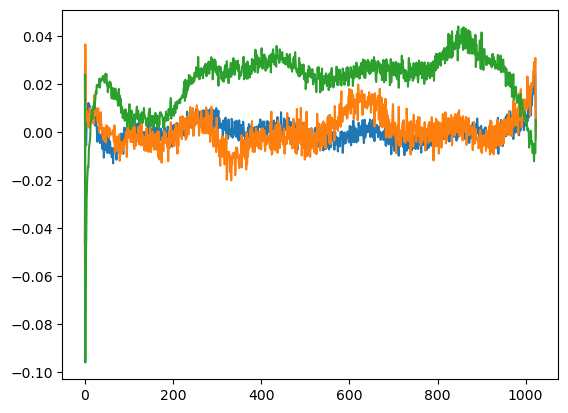

In [11]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])

In [12]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [14]:
model_hf.config.tie_word_embeddings

True